In [1]:
# Full import of Qiskit library
from qiskit import *

In [2]:
try:
    # Create a Quantum Register with 1 Qubits.
    qr = QuantumRegister(1)

    # Create a classical register with 1 bits
    cr = ClassicalRegister(1)

    # Create a Quantum Circuit containing our QR and CR. 
    circuit = QuantumCircuit(qr,cr)

    # Prepare the method to draw our quantum program
    circuit.draw();

except NameError:
    print("ERROR: There is either an error in your code - or you have not run the library import block above correctly\n"*10)

In [3]:
# In order have have to qubit in |1> we first have to apply, an X-Gate on the qubit in |0>
circuit.x(qr[0])
circuit.barrier()

In [4]:
circuit.h(qr[0])
circuit.x(qr[0])
circuit.h(qr[0])

circuit.draw()

circuit.measure(qr, cr)

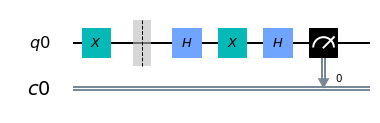

In [5]:
circuit.draw(output='mpl')

In [6]:
# We load the backend to run our Quantum Program
backend = BasicAer.get_backend('qasm_simulator')

# We execute the Quantum Programwe, but have added "shots=4096, memory=True" to the execute() function. 
job = qiskit.execute(circuit, backend, shots=4096, memory=True)

# Get the results from the job
result = job.result().get_counts(circuit)

# A quick print out of our result
print(result)

{'1': 4096}


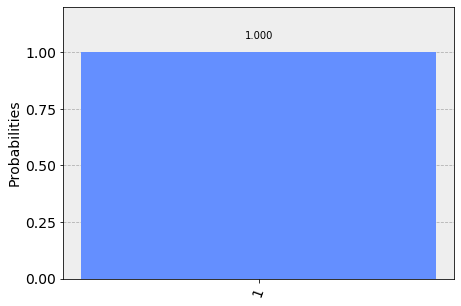

In [7]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(result)